# MA261 Assignment 2

Student ID: 2106983

---

In [1]:
import numpy as np
def npPrint(a, f={'float_kind':lambda x: "%.5e" % x}): 
   print( np.array2string(a, formatter=f) )
from matplotlib import pyplot as plt
import pandas as pd

## Q 2.0.

In [2]:
def newton (F, DF, x0, eps,K):
    k=0
    x=x0
    while (k<K):
        gamma=np.linalg.solve(DF(x),F(x))
        x=x-gamma
        k=k+1
        if np.linalg.norm(F(x))<eps:
            break
            
    if (np.linalg.norm(F(x0))<eps):
        x=x0
        k=0
    return x, k

In [3]:
def backwardEuler(f,Df, t0,y0, h):
    m = y0.size
    def F(x):
        return x-f(t0+h,y0+h*x)
    def DF(x):
        return np.eye(m)-h*Df(t0+h,y0+h*x)
    x,k=newton(F,DF,f(t0+h,y0),h*h*1e-5,1000)
    return y0+h*x

## Other functions needed

In [4]:
def forwardEuler( f,Df, t0,y0, h):
    return y0 + h*f(t0,y0)

In [5]:
def Q11(f,Df, t0,y0, h):
    x=f(t0,y0)
    y1=y0+(h/2)*(x+f(t0+h,y0+h*x))
    return y1

In [6]:
def evolve(phi, f,Df, t0,y0, T,N):
    n=np.arange(0,N+1,1)
    h=T/N
    t=n*h
    
    y=np.zeros((N+1,len(y0)))
    y[0]=y0
    for i in range(N):
        y[i+1]=phi(f,Df,t[i],y[i],h)
        
    return t,y

In [7]:
def computeEocs( herr ):
    m=np.size(herr,0)
    eocs=np.zeros(m-1)
    h=herr[:,0]
    e=herr[:,1]
    for i in range(m-1):
        eocs[i]=(np.log(e[i+1]/e[i])/np.log(h[i+1]/h[i]))
    return eocs

In [8]:
def experiment(stepper):
    M    = 10
    N0   = 25
    herr = np.zeros( [M,2] )
    for m in range(M):
        N = N0*2**m
        t,y = evolve( stepper, f,Df, 0,Y(0),T, N)
        herr[m] = [T/N, 0]
        for tn,yn in zip(t,y):
            herr[m][1] = max(herr[m][1], np.linalg.norm(yn-Y(tn)) )

    eoc = computeEocs( herr )
    eoc = np.hstack( [ [np.nan],eoc ] )
    res = np.hstack( [herr, np.atleast_2d(eoc).T] )

    return res

# Q 2.1.

In [9]:
def crankNicholson(f,Df,t0,y0,h):
    m = y0.size
    def F(x):
        return x-f(t0,y0)-f(t0+h,y0+(h/2)*x)
    def DF(x):
        return np.eye(m)-(h/2)*Df(t0+h,y0+(h/2)*x)
    x,k=newton(F,DF,f(t0+h,y0),h*h*1e-5,1000)
    return y0+(h/2)*x

In [10]:
def f(t,y):
    return np.array([y[1],y[1]*(1-2*y[0])])

def Df(t,y):
    return np.array([[0,1],[-2*y[1],1-2*y[0]]])

def Y(t):
    Y=np.zeros(2)
    Y[0]=2*np.exp(t)/(2*np.exp(t)-1)
    Y[1]=-2*np.exp(t)/((2*np.exp(t)-1)**2)
    return Y

y0=np.array([2,-2])
T=10
N0=25

In [11]:
resFE = experiment(forwardEuler)
resBE = experiment(backwardEuler)
resQ11 = experiment(Q11)
resCN = experiment(crankNicholson)

,h,FE-error,FE-eoc,BE-error,BE-eoc,Q11-error,Q11-eoc,CN-error,CN-eoc
0,4.0000e-01,1.197520e+00,nan,4.596387e+00,nan,2.336009e-01,nan,1.853746e-01,nan
1,2.0000e-01,3.849013e-01,1.637,1.949440e-01,4.559,5.724377e-02,2.029,4.250296e-02,2.125
2,1.0000e-01,1.424462e-01,1.434,1.058020e-01,0.882,1.252991e-02,2.192,1.013313e-02,2.068
3,5.0000e-02,6.525497e-02,1.126,5.635233e-02,0.909,2.894328e-03,2.114,2.522718e-03,2.006
4,2.5000e-02,3.135656e-02,1.057,2.914622e-02,0.951,6.889803e-04,2.071,6.287615e-04,2.004
5,1.2500e-02,1.538350e-02,1.027,1.483127e-02,0.975,1.680073e-04,2.036,1.571657e-04,2.000
6,6.2500e-03,7.620535e-03,1.013,7.482302e-03,0.987,4.148271e-05,2.018,3.928423e-05,2.000
7,3.1250e-03,3.792678e-03,1.007,3.758094e-03,0.993,1.030578e-05,2.009,9.820607e-06,2.000
8,1.5625e-03,1.891968e-03,1.003,1.883324e-03,0.997,2.568356e-06,2.005,2.455153e-06,2.000
9,7.8125e-04,9.448989e-04,1.002,9.427381e-04,0.998,6.410798e-07,2.002,6.137865e-07,2.000


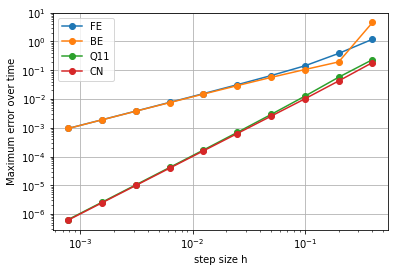

In [12]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'
        keys[columns[2*i+2]]   = results[k][:,2] # eocs
        styles[columns[2*i+2]] = '{:.3f}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Maximum error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()


compareErrors({"FE":resFE,"BE":resBE,"Q11":resQ11,"CN":resCN})

Summary Q2.1
------------

The table and plot above includes the data already seen in Assignment 1 and in additional has the errors and eocs for the Crank-Nicholson method. The eocs for this method clearly converge to 2 which agrees with the theory we have seen that it converges with second order. The errors for varying h closely allign with the errors using the Q11 and in fact it is just below the line for the Q11 method therefore it actually has the lowest errors for all h.

## Q2.2

In [13]:
def experiment(stepper):
    M    = 11
    T    = 40
    N0   = 150
    herr = np.zeros( [M,2] )
    for m in range(M):
        N = N0*2**m
        t,y = evolve( stepper, f,Df, 0,Y(0),T, N)
        herr[m] = [T/N, 0]
        for tn,yn in zip(t,y):
            herr[m][1] = max(herr[m][1], np.linalg.norm(yn-Y(tn)) )

    eoc = computeEocs( herr )
    eoc = np.hstack( [ [np.nan],eoc ] )
    res = np.hstack( [herr, np.atleast_2d(eoc).T] )

    return res

In [14]:
k=0.8
y0=np.array([0,1])
T=40
t0=0

# r=2

def f(t,y):
    return np.array([y[1],-y[0]])

def Df(t,y):
    return np.array([[0,1],[-1,0]])

def Y(t):
    return np.array([np.sin(t),np.cos(t)])

In [15]:
res2Q11 = experiment(Q11)
res2CN = experiment(crankNicholson)
res2BE = experiment(backwardEuler)

In [16]:
# r=4

def f(t,y):
    return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])

def Df(t,y):
    return np.array([[0,1],[6*k**2*y[0]**2-(k**2+1),0]])

from scipy.special import ellipj
def Y(t):
    sn, cn, dn, _ = ellipj (t, k*k)
    return np.array ([ sn , cn * dn ])

In [17]:
res4Q11 = experiment(Q11)
res4CN = experiment(crankNicholson)
res4BE = experiment(backwardEuler)

/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/1204112027.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/1204112027.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/253540574.py:7: RuntimeWarning: divide by zero encountered in log
  eocs[i]=(np.log(e[i+1]/e[i])/np.log(h[i+1]/h[i]))


/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/1204112027.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/1204112027.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])


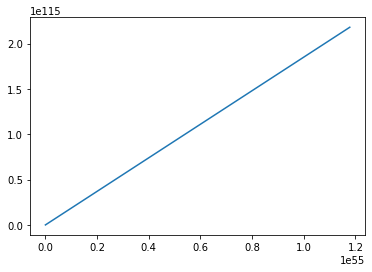

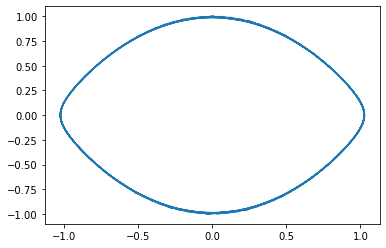

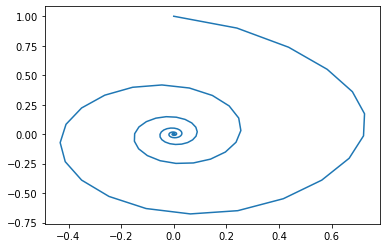

In [18]:
t,y1  = evolve(Q11,f,Df,0,y0,T,150)
t,y2  = evolve(crankNicholson,f,Df,0,y0,T,150)
t,y3  = evolve(backwardEuler,f,Df,0,y0,T,150)
plt.plot(y1[:,0],  y1[:,1])
plt.show()
plt.plot(y2[:,0],  y2[:,1])
plt.show()
plt.plot(y3[:,0],  y3[:,1])
plt.show()

*Can't figure out how to do the trajectories

## Q2.3

In [19]:
# r=2
def semiImplicit2(f,Df,t0,y0,h):
    return np.array([y0[0]+h*y0[1],y0[1]-h*(y0[0]+h*y0[1])])

def f(t,y):
    return np.array([y[1],-y[0]])

def Df(t,y):
    return np.array([[0,1],[-1,0]])

def Y(t):
    return np.array([np.sin(t),np.cos(t)])

In [20]:
res2SI = experiment(semiImplicit2)

In [21]:
# r=4
def semiImplicit4(f,Df,t0,y0,h):
    return np.array([y0[0]+h*y0[1],y0[1]-h*((k**2+1)*(y0[0]+h*y0[1])-2*k**2*(y0[0]+h*y0[1])**3)])

def f(t,y):
    return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])

def Df(t,y):
    return np.array([[0,1],[6*k**2*y[0]**2-(k**2+1),0]])

from scipy.special import ellipj
def Y(t):
    sn, cn, dn, _ = ellipj (t, k*k)
    return np.array ([ sn , cn * dn ])

In [22]:
res4SI = experiment(semiImplicit4)

r=2


,h,SI-error,SI-eoc,BE-error,BE-eoc,Q11-error,Q11-eoc,CN-error,CN-eoc
0,2.6667e-01,2.516098e-01,nan,9.964574e-01,nan,4.920079e-01,nan,2.340031e-01,nan
1,1.3333e-01,9.588617e-02,1.392,9.309638e-01,0.098,1.191125e-01,2.046,5.909313e-02,1.985
2,6.6667e-02,4.063059e-02,1.239,7.362502e-01,0.339,2.964800e-02,2.006,1.480481e-02,1.997
3,3.3333e-02,1.848764e-02,1.136,4.865085e-01,0.598,7.407921e-03,2.001,3.703084e-03,1.999
4,1.6667e-02,8.788152e-03,1.073,2.834529e-01,0.779,1.851863e-03,2.000,9.258873e-04,2.000
5,8.3333e-03,4.280311e-03,1.038,1.535157e-01,0.885,4.629630e-04,2.000,2.314791e-04,2.000
6,4.1667e-03,2.111746e-03,1.019,7.995523e-02,0.941,1.157407e-04,2.000,5.787022e-05,2.000
7,2.0833e-03,1.048769e-03,1.010,4.081050e-02,0.970,2.893518e-05,2.000,1.446758e-05,2.000
8,1.0417e-03,5.226089e-04,1.005,2.061781e-02,0.985,7.233796e-06,2.000,3.616898e-06,2.000
9,5.2083e-04,2.608605e-04,1.002,1.036260e-02,0.993,1.808449e-06,2.000,9.042245e-07,2.000


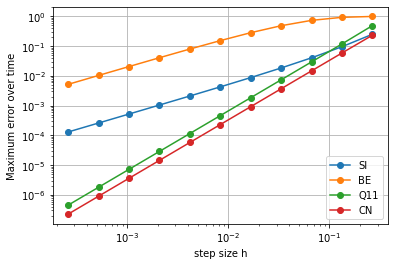

In [23]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'
        keys[columns[2*i+2]]   = results[k][:,2] # eocs
        styles[columns[2*i+2]] = '{:.3f}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Maximum error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=2")
compareErrors({"SI":res2SI,"BE":res2BE,"Q11":res2Q11,"CN":res2CN})

r=4


,h,SI-error,SI-eoc,BE-error,BE-eoc,Q11-error,Q11-eoc,CN-error,CN-eoc
0,2.6667e-01,1.806380e+00,nan,1.245470e+00,nan,inf,nan,1.671346e+00,nan
1,1.3333e-01,5.503766e-01,1.715,1.391192e+00,-0.160,1.586126e+00,inf,5.155171e-01,1.697
2,6.6667e-02,1.347051e-01,2.031,1.651777e+00,-0.248,3.242903e-01,2.290,1.270695e-01,2.020
3,3.3333e-02,3.330688e-02,2.016,1.777689e+00,-0.106,5.871152e-02,2.466,3.153801e-02,2.010
4,1.6667e-02,8.303854e-03,2.004,1.797906e+00,-0.016,1.201850e-02,2.288,7.868315e-03,2.003
5,8.3333e-03,2.971172e-03,1.483,1.865162e+00,-0.053,2.677790e-03,2.166,1.966058e-03,2.001
6,4.1667e-03,1.487067e-03,0.999,1.940380e+00,-0.057,6.288111e-04,2.090,4.914495e-04,2.000
7,2.0833e-03,7.439090e-04,0.999,1.535497e+00,0.338,1.521329e-04,2.047,1.228583e-04,2.000
8,1.0417e-03,3.720478e-04,1.000,1.013199e+00,0.600,3.739999e-05,2.024,3.071432e-05,2.000
9,5.2083e-04,1.860472e-04,1.000,5.788232e-01,0.808,9.270870e-06,2.012,7.678565e-06,2.000


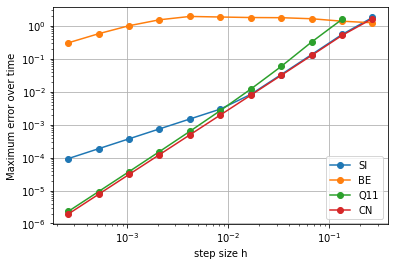

In [24]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'
        keys[columns[2*i+2]]   = results[k][:,2] # eocs
        styles[columns[2*i+2]] = '{:.3f}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Maximum error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=4")
compareErrors({"SI":res4SI,"BE":res4BE,"Q11":res4Q11,"CN":res4CN})

In [25]:
def H2(y):
    return y[1]**2/2+y[0]**2/2

def H4(y):
    return y[1]**2/2+(k**2+1)*y[0]**2/2-k**2*y[0]**4/2

In [26]:
# r=2

def f(t,y):
    return np.array([y[1],-y[0]])

def Df(t,y):
    return np.array([[0,1],[-1,0]])

In [27]:
Eham_hQ112=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(Q11,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hQ112[i,:]=[h,np.max(err)]


In [28]:
Eham_hCN2=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(crankNicholson,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hCN2[i,:]=[h,np.max(err)]


In [29]:
Eham_hBE2=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(backwardEuler,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hBE2[i,:]=[h,np.max(err)]


In [30]:
Eham_hSI2=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(semiImplicit2,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hSI2[i,:]=[h,np.max(err)]


In [31]:
# r=4

def f(t,y):
    return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])

def Df(t,y):
    return np.array([[0,1],[6*k**2*y[0]**2-(k**2+1),0]])

In [32]:
Eham_hQ114=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(Q11,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H4(y[j])-H4(y0))/np.linalg.norm(H4(y0)))
    err=np.array(err)
    Eham_hQ114[i,:]=[h,np.max(err)]


/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/770591599.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/770591599.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/944167666.py:5: RuntimeWarning: overflow encountered in double_scalars
  return y[1]**2/2+(k**2+1)*y[0]**2/2-k**2*y[0]**4/2
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/944167666.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return y[1]**2/2+(k**2+1)*y[0]**2/2-k**2*y[0]**4/2


In [33]:
Eham_hCN4=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(crankNicholson,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H4(y[j])-H4(y0))/np.linalg.norm(H4(y0)))
    err=np.array(err)
    Eham_hCN4[i,:]=[h,np.max(err)]


In [34]:
Eham_hBE4=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(backwardEuler,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H4(y[j])-H4(y0))/np.linalg.norm(H4(y0)))
    err=np.array(err)
    Eham_hBE4[i,:]=[h,np.max(err)]


In [35]:
Eham_hSI4=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(semiImplicit4,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H4(y[j])-H4(y0))/np.linalg.norm(H4(y0)))
    err=np.array(err)
    Eham_hSI4[i,:]=[h,np.max(err)]


/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/290101906.py:3: RuntimeWarning: overflow encountered in double_scalars
  return np.array([y0[0]+h*y0[1],y0[1]-h*((k**2+1)*(y0[0]+h*y0[1])-2*k**2*(y0[0]+h*y0[1])**3)])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/290101906.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([y0[0]+h*y0[1],y0[1]-h*((k**2+1)*(y0[0]+h*y0[1])-2*k**2*(y0[0]+h*y0[1])**3)])
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/944167666.py:5: RuntimeWarning: overflow encountered in double_scalars
  return y[1]**2/2+(k**2+1)*y[0]**2/2-k**2*y[0]**4/2
/var/folders/6m/d_m06xzj59bctjxjdqwpp04m0000gn/T/ipykernel_23601/944167666.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return y[1]**2/2+(k**2+1)*y[0]**2/2-k**2*y[0]**4/2


r=2


,h,BE-ham error,BE-eoc,SI-ham error,SI-eoc,Q11-ham error,Q11-eoc,CN-ham error,CN-eoc
0,1.6000e+00,1.000000e+00,nan,3.993600e+00,nan,3.415985e+10,nan,8.881784e-16,nan
1,8.0000e-01,1.000000e+00,nan,6.659478e-01,nan,1.299062e+02,nan,8.881784e-16,nan
2,4.0000e-01,9.999996e-01,nan,2.499990e-01,nan,8.926173e-01,nan,1.332268e-15,nan
3,2.0000e-01,9.996080e-01,nan,1.111103e-01,nan,8.326974e-02,nan,1.332268e-15,nan
4,1.0000e-01,9.813168e-01,nan,5.262631e-02,nan,1.005004e-02,nan,5.551115e-16,nan
5,5.0000e-02,8.643265e-01,nan,2.564102e-02,nan,1.250781e-03,nan,1.554312e-15,nan
6,2.5000e-02,6.320056e-01,nan,1.265823e-02,nan,1.562622e-04,nan,4.218847e-15,nan
7,1.2500e-02,3.934456e-01,nan,6.289287e-03,nan,1.953144e-05,nan,3.108624e-15,nan
8,6.2500e-03,2.211954e-01,nan,3.134796e-03,nan,2.441409e-06,nan,1.021405e-14,nan
9,3.1250e-03,1.175026e-01,nan,1.564945e-03,nan,3.051758e-07,nan,1.376677e-14,nan


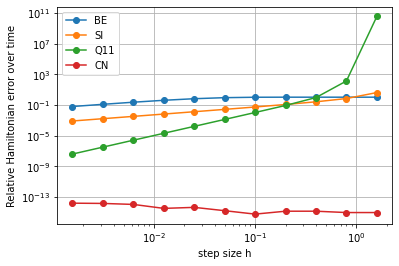

In [40]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-ham error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Relative Hamiltonian error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=2")
compareErrors({"BE":Eham_hBE2,"SI":Eham_hSI2,"Q11":Eham_hQ112,"CN":Eham_hCN2})

r=4


,h,BE-ham error,BE-eoc,SI-ham error,SI-eoc,Q11-ham error,Q11-eoc,CN-ham error,CN-eoc
0,1.6000e+00,4.752462e-01,nan,nan,nan,nan,nan,3.854955e+05,nan
1,8.0000e-01,1.000000e+00,nan,nan,nan,nan,nan,7.588483e+07,nan
2,4.0000e-01,1.000000e+00,nan,2.793742e-01,nan,nan,nan,4.312767e-02,nan
3,2.0000e-01,9.999939e-01,nan,1.201898e-01,nan,nan,nan,1.021861e-02,nan
4,1.0000e-01,9.968034e-01,nan,5.601931e-02,nan,1.230646e-02,nan,2.526324e-03,nan
5,5.0000e-02,9.201333e-01,nan,2.707927e-02,nan,1.839743e-03,nan,6.298903e-04,nan
6,2.5000e-02,6.442558e-01,nan,1.331537e-02,nan,3.083518e-04,nan,1.573681e-04,nan
7,1.2500e-02,3.435652e-01,nan,6.602671e-03,nan,5.819893e-05,nan,3.933550e-05,nan
8,6.2500e-03,1.638981e-01,nan,3.287710e-03,nan,1.219070e-05,nan,9.833469e-06,nan
9,3.1250e-03,7.584046e-02,nan,1.640464e-03,nan,2.752930e-06,nan,2.458342e-06,nan


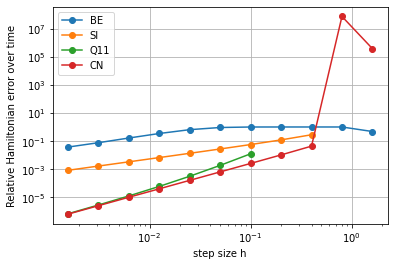

In [41]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-ham error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Relative Hamiltonian error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=4")
compareErrors({"BE":Eham_hBE4,"SI":Eham_hSI4,"Q11":Eham_hQ114,"CN":Eham_hCN4})

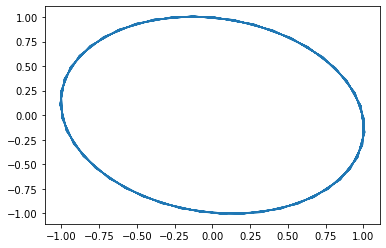

In [42]:
t,y4  = evolve(semiImplicit2,f,Df,0,y0,T,150)
plt.plot(y4[:,0],  y4[:,1])

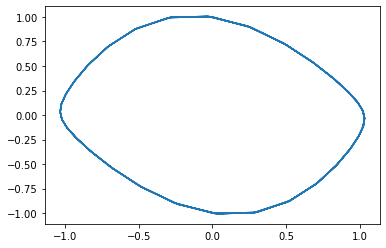

In [43]:
t,y5  = evolve(semiImplicit4,f,Df,0,y0,T,150)
plt.plot(y5[:,0],  y5[:,1])

Summary Q2.2/3
------------

For r=2:

In the figures showing error and eocs we see that Q11 and crank Nicholson method have order of convergence 2, the semi-implicit method has order of convergence 1 and backward euler needs more investigation but seems to most likely have order of convergence 1. This pattern is further shown in the error plot which clearly shows crank nicholson Q11 and semi-implicit having low relative errors with semi implicit a bit more and then backward euler having a comparatively larger error.

The Eham error table and plot show that the crank-Nicholson has by far the smallest hamiltonian error over h with the other 3 methods having relatively similar Eham errors. This is less so for larger values of h for which the semi implicit method and the backward euler method are largely the same but the Q11 method starts having much larger error.

For r=4:

We see largely the same patterns especially for the erros and the eocs, however there is a big difference in the Ehams. For decreasing h the methods have the same order of smallest Eham to largest but as h increases the Crank nicholson method clearly has the largest relative hamiltonian error.

The semi-implicit method seems to have order of convergence 1 as the eocs clearly converge to 1.

## Q2.4.

In [44]:
k=0.8
y0=np.array([0,1])
T=40
N0=150
t0=0
r=2

# r=2

def V(x):
    return (k*k+1)/2*x**2 - k*k/2*x**r

def DV(x):
    return (k*k+1)*x      - k*k/2*r*x**(r-1)

def D2V(x):
    return (k*k+1)        - k*k/2*r*(r-1)*x**(r-2)

def f(t,y):
    return np.array([y[1],-DV(y[0])])

def Df(t,y):
    return np.array([[0,1],[-D2V(y[0]),0]])

def Y(t):
    return np.array([np.sin(t),np.cos(t)])

In [45]:
def fullyImplicit(V,DV,t0,y0,h):
    def F(x):
        return np.array([x[0]-y0[0]-h*y0[1]+h**2/2*(V(x[0])-V(y0[0]))/(x[0]-y0[0])])
    def DF(x):
        return np.array([[1+h**2/2*((x[0]-y0[0])*DV(x[0])-V(x[0])+V(y0[0]))/(x[0]-y0[0])**2]])
    x0 = y0[0]+h*y0[1]-h**2/2*DV(y0[0])
    x,k=newton(F,DF,np.array([x0]),h*h*1e-5,1000)
    assert k < 1000
    p1=y0[1]-h*((V(x[0])-V(y0[0]))/(x[0]-y0[0]))
    return np.array([x[0],p1])

fiStepper = lambda f,Df,t0,y0,h: fullyImplicit(V,DV,t0,y0,h)

In [46]:
resFI2=experiment(fiStepper)

In [47]:
Eham_hFI2=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(fiStepper,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hFI2[i,:]=[h,np.max(err)]

In [48]:
# r=4

def f(t,y):
    return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])

def Df(t,y):
    return np.array([[0,1],[6*k**2*y[0]**2-(k**2+1),0]])

from scipy.special import ellipj
def Y(t):
    sn, cn, dn, _ = ellipj (t, k*k)
    return np.array ([ sn , cn * dn ])

def V(x):
    return (k**2+1)*x**2/2-k**2*x**4/2

def DV(x):
    return (k**2+1)*x-2*k**2*x**3

In [49]:
resFI4=experiment(fiStepper)

In [50]:
Eham_hFI4=np.zeros((11,2))
for i in range(11):
    err=[]
    N=N0*2**i
    h=T/N
    t,y=evolve(fiStepper,f,Df,0,y0,T,N)
    for j in range(np.shape(y)[0]):
        err.append(np.linalg.norm(H2(y[j])-H2(y0))/np.linalg.norm(H2(y0)))
    err=np.array(err)
    Eham_hFI4[i,:]=[h,np.max(err)]

r=2


,h,SI-error,SI-eoc,FI-error,FI-eoc,BE-error,BE-eoc,Q11-error,Q11-eoc,CN-error,CN-eoc
0,2.6667e-01,2.516098e-01,nan,2.340031e-01,nan,9.964574e-01,nan,4.920079e-01,nan,2.340031e-01,nan
1,1.3333e-01,9.588617e-02,1.392,5.909313e-02,1.985,9.309638e-01,0.098,1.191125e-01,2.046,5.909313e-02,1.985
2,6.6667e-02,4.063059e-02,1.239,1.480481e-02,1.997,7.362502e-01,0.339,2.964800e-02,2.006,1.480481e-02,1.997
3,3.3333e-02,1.848764e-02,1.136,3.703084e-03,1.999,4.865085e-01,0.598,7.407921e-03,2.001,3.703084e-03,1.999
4,1.6667e-02,8.788152e-03,1.073,9.258873e-04,2.000,2.834529e-01,0.779,1.851863e-03,2.000,9.258873e-04,2.000
5,8.3333e-03,4.280311e-03,1.038,2.314791e-04,2.000,1.535157e-01,0.885,4.629630e-04,2.000,2.314791e-04,2.000
6,4.1667e-03,2.111746e-03,1.019,5.787020e-05,2.000,7.995523e-02,0.941,1.157407e-04,2.000,5.787022e-05,2.000
7,2.0833e-03,1.048769e-03,1.010,1.446752e-05,2.000,4.081050e-02,0.970,2.893518e-05,2.000,1.446758e-05,2.000
8,1.0417e-03,5.226089e-04,1.005,3.616762e-06,2.000,2.061781e-02,0.985,7.233796e-06,2.000,3.616898e-06,2.000
9,5.2083e-04,2.608605e-04,1.002,9.039026e-07,2.000,1.036260e-02,0.993,1.808449e-06,2.000,9.042245e-07,2.000


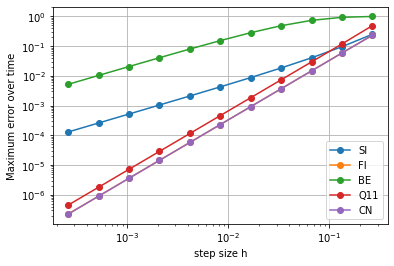

In [51]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'
        keys[columns[2*i+2]]   = results[k][:,2] # eocs
        styles[columns[2*i+2]] = '{:.3f}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Maximum error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=2")
compareErrors({"SI":res2SI,"FI":resFI2,"BE":res2BE,"Q11":res2Q11,"CN":res2CN})

r=4


,h,SI-error,SI-eoc,FI-error,FI-eoc,BE-error,BE-eoc,Q11-error,Q11-eoc,CN-error,CN-eoc
0,2.6667e-01,1.806380e+00,nan,1.321201e-01,nan,1.245470e+00,nan,inf,nan,1.671346e+00,nan
1,1.3333e-01,5.503766e-01,1.715,3.303342e-02,2.000,1.391192e+00,-0.160,1.586126e+00,inf,5.155171e-01,1.697
2,6.6667e-02,1.347051e-01,2.031,8.266157e-03,1.999,1.651777e+00,-0.248,3.242903e-01,2.290,1.270695e-01,2.020
3,3.3333e-02,3.330688e-02,2.016,2.067532e-03,1.999,1.777689e+00,-0.106,5.871152e-02,2.466,3.153801e-02,2.010
4,1.6667e-02,8.303854e-03,2.004,5.173182e-04,1.999,1.797906e+00,-0.016,1.201850e-02,2.288,7.868315e-03,2.003
5,8.3333e-03,2.971172e-03,1.483,1.292335e-04,2.001,1.865162e+00,-0.053,2.677790e-03,2.166,1.966058e-03,2.001
6,4.1667e-03,1.487067e-03,0.999,3.229364e-05,2.001,1.940380e+00,-0.057,6.288111e-04,2.090,4.914495e-04,2.000
7,2.0833e-03,7.439090e-04,0.999,8.077471e-06,1.999,1.535497e+00,0.338,1.521329e-04,2.047,1.228583e-04,2.000
8,1.0417e-03,3.720478e-04,1.000,2.016561e-06,2.002,1.013199e+00,0.600,3.739999e-05,2.024,3.071432e-05,2.000
9,5.2083e-04,1.860472e-04,1.000,5.091740e-07,1.986,5.788232e-01,0.808,9.270870e-06,2.012,7.678565e-06,2.000


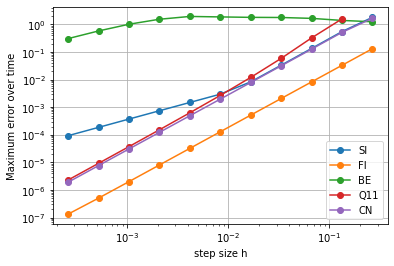

In [52]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'
        keys[columns[2*i+2]]   = results[k][:,2] # eocs
        styles[columns[2*i+2]] = '{:.3f}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Maximum error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=4")
compareErrors({"SI":res4SI,"FI":resFI4,"BE":res4BE,"Q11":res4Q11,"CN":res4CN})

r=2


,h,BE-ham error,BE-eoc,FI-ham error,FI-eoc,SI-ham error,SI-eoc,Q11-ham error,Q11-eoc,CN-ham error,CN-eoc
0,1.6000e+00,1.000000e+00,nan,6.661338e-15,nan,3.993600e+00,nan,3.415985e+10,nan,8.881784e-16,nan
1,8.0000e-01,1.000000e+00,nan,1.221245e-15,nan,6.659478e-01,nan,1.299062e+02,nan,8.881784e-16,nan
2,4.0000e-01,9.999996e-01,nan,1.887379e-15,nan,2.499990e-01,nan,8.926173e-01,nan,1.332268e-15,nan
3,2.0000e-01,9.996080e-01,nan,4.218847e-15,nan,1.111103e-01,nan,8.326974e-02,nan,1.332268e-15,nan
4,1.0000e-01,9.813168e-01,nan,3.996803e-15,nan,5.262631e-02,nan,1.005004e-02,nan,5.551115e-16,nan
5,5.0000e-02,8.643265e-01,nan,1.365107e-09,nan,2.564102e-02,nan,1.250781e-03,nan,1.554312e-15,nan
6,2.5000e-02,6.320056e-01,nan,7.235876e-10,nan,1.265823e-02,nan,1.562622e-04,nan,4.218847e-15,nan
7,1.2500e-02,3.934456e-01,nan,3.799427e-10,nan,6.289287e-03,nan,1.953144e-05,nan,3.108624e-15,nan
8,6.2500e-03,2.211954e-01,nan,4.019889e-10,nan,3.134796e-03,nan,2.441409e-06,nan,1.021405e-14,nan
9,3.1250e-03,1.175026e-01,nan,4.038443e-10,nan,1.564945e-03,nan,3.051758e-07,nan,1.376677e-14,nan


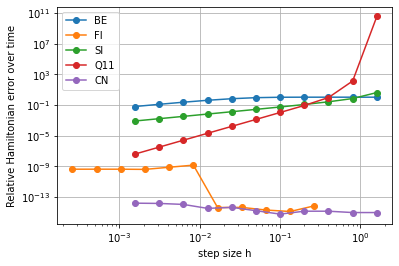

In [53]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-ham error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Relative Hamiltonian error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=2")
compareErrors({"BE":Eham_hBE2,"FI":Eham_hFI2,"SI":Eham_hSI2,"Q11":Eham_hQ112,"CN":Eham_hCN2})

r=4


,h,BE-ham error,BE-eoc,FI-ham error,FI-eoc,SI-ham error,SI-eoc,Q11-ham error,Q11-eoc,CN-ham error,CN-eoc
0,1.6000e+00,4.752462e-01,nan,1.600129e-01,nan,nan,nan,nan,nan,3.854955e+05,nan
1,8.0000e-01,1.000000e+00,nan,1.599953e-01,nan,nan,nan,nan,nan,7.588483e+07,nan
2,4.0000e-01,1.000000e+00,nan,1.599997e-01,nan,2.793742e-01,nan,nan,nan,4.312767e-02,nan
3,2.0000e-01,9.999939e-01,nan,1.599992e-01,nan,1.201898e-01,nan,nan,nan,1.021861e-02,nan
4,1.0000e-01,9.968034e-01,nan,1.600000e-01,nan,5.601931e-02,nan,1.230646e-02,nan,2.526324e-03,nan
5,5.0000e-02,9.201333e-01,nan,1.600000e-01,nan,2.707927e-02,nan,1.839743e-03,nan,6.298903e-04,nan
6,2.5000e-02,6.442558e-01,nan,1.600000e-01,nan,1.331537e-02,nan,3.083518e-04,nan,1.573681e-04,nan
7,1.2500e-02,3.435652e-01,nan,1.600000e-01,nan,6.602671e-03,nan,5.819893e-05,nan,3.933550e-05,nan
8,6.2500e-03,1.638981e-01,nan,1.600000e-01,nan,3.287710e-03,nan,1.219070e-05,nan,9.833469e-06,nan
9,3.1250e-03,7.584046e-02,nan,1.600000e-01,nan,1.640464e-03,nan,2.752930e-06,nan,2.458342e-06,nan


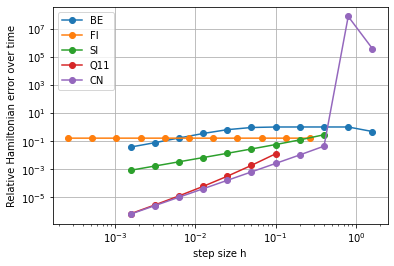

In [54]:
def compareErrors(results):
    # columns of table
    simul = list(results.keys())
    columns=['h'] + [s for n in simul for s in [f'{n}-ham error', f'{n}-eoc']]
    # values in tablea
    keys   = {columns[0]: results[simul[0]][:,0]} # all results are assumed to use the same sequence of h
    styles = {columns[0]: '{:.4e}'}
    for i, k in enumerate(simul):
        keys[columns[2*i+1]]   = results[k][:,1] # errors
        styles[columns[2*i+1]] = '{:.6e}'

    # generate table
    table = pd.DataFrame(keys, index=range(results[simul[0]].shape[0]), # all results must have the same shape
            columns=columns)

    # format floating points for each column for jupyter output (does not work in pdf)
    display( table.style.format(styles) )

    for i,k in enumerate(simul):
        plt.loglog(results[k][:,0],results[k][:,1],marker='o',label=k)
    plt.legend()
    plt.grid(True)
    plt.xlabel("step size h")
    plt.ylabel("Relative Hamiltonian error over time")
    plt.savefig("Q2_compareErr.pdf", format="pdf", bbox_inches="tight") # output to pdf for inclusing in tex document
    plt.show()

print("r=4")
compareErrors({"BE":Eham_hBE4,"FI":Eham_hFI4,"SI":Eham_hSI4,"Q11":Eham_hQ114,"CN":Eham_hCN4})

In [55]:
r=2

# r=2

def V(x):
    return (k*k+1)/2*x**2 - k*k/2*x**r

def DV(x):
    return (k*k+1)*x      - k*k/2*r*x**(r-1)

def D2V(x):
    return (k*k+1)        - k*k/2*r*(r-1)*x**(r-2)

def f(t,y):
    return np.array([y[1],-DV(y[0])])

def Df(t,y):
    return np.array([[0,1],[-D2V(y[0]),0]])

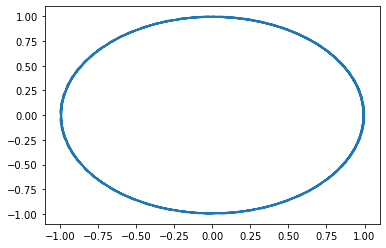

In [56]:
t,y6  = evolve(fiStepper,f,Df,0,y0,T,150)
plt.plot(y6[:,0],  y6[:,1])

In [57]:
# r=4

def f(t,y):
    return np.array([y[1],2*k**2*y[0]**3-(k**2+1)*y[0]])

def Df(t,y):
    return np.array([[0,1],[6*k**2*y[0]**2-(k**2+1),0]])

def V(x):
    return (k**2+1)*x**2/2-k**2*x**4/2

def DV(x):
    return (k**2+1)*x-2*k**2*x**3

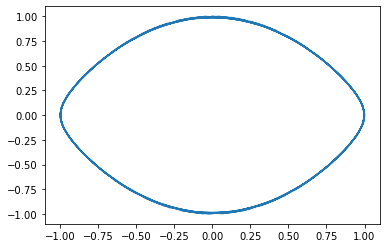

In [58]:
t,y7  = evolve(fiStepper,f,Df,0,y0,T,150)
plt.plot(y7[:,0],  y7[:,1])

Summary Q2.4
------------

Justification of the formulation of the implementation is attached via a picture of my whiteboard (don't know how to add it here). I tried to use $p_n$ as an initial guess because $V(x_n+h*delta_n)$ is approximately $V(x_n)$ so when you substitute that in the equation for $delta_n$ you are left with $p_n$

Sorry could not get the implementation to work on this one. Would've produced one table and graph with all methods errors, eocs, ham errors etc but just did all the methods up to Q2.3.